In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [12]:
palette = ['black', 'darkred', 'darkolivegreen', 'darkgoldenrod', 'navy', 'darkmagenta'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Number of stations"

In [3]:
data = pd.read_csv('station.csv').drop_duplicates()
data

,rngRun,nStations,distance,linksNumber,loss,jitter,latency,throughput
0,407456,1,5,1,19.172300,0.000037,0.840340,120.4180
1,407456,2,5,1,62.066500,0.000264,1.489910,113.0270
2,407456,1,5,2,0.101128,0.000042,0.000484,148.8300
3,407456,3,5,1,76.002400,0.000512,2.001160,107.2550
4,407456,2,5,2,50.025500,0.000060,0.007872,148.9040
5,407456,1,5,3,0.101059,0.000055,0.000254,148.8300
6,407456,2,5,3,0.174598,0.000071,0.002501,297.4410
7,407456,3,5,2,52.154600,0.000241,1.260270,213.8410
8,407456,4,5,1,82.825400,0.000771,2.409460,102.3470
9,407456,4,5,2,65.442800,0.000379,1.587370,205.9340


C:\Users\Admin\AppData\Local\Temp\ipykernel_79608\2246899434.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='nStations', y='throughput', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')


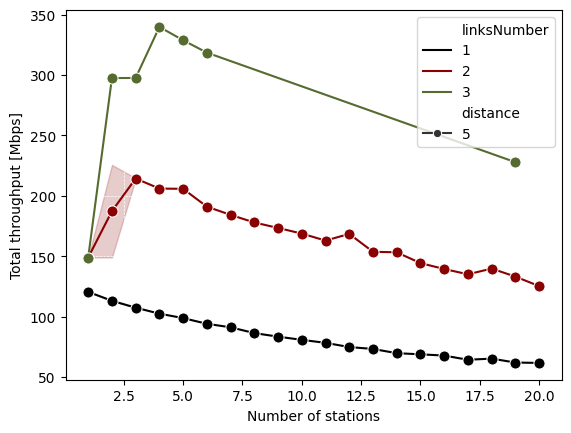

In [13]:
plot_sum = data.groupby(['nStations', 'linksNumber', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='nStations', y='throughput', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)


ax.set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
plt.savefig('dist_thr.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_79608\2546753322.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='nStations', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')


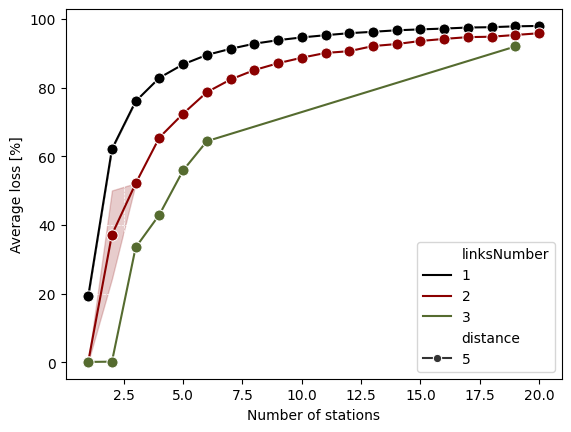

In [18]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='nStations', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)


ax.set(xlabel=xlabel, ylabel='Average loss [%]')
plt.savefig('sta_loss.svg', bbox_inches='tight')

In [6]:
plot_sum = plot_sum[plot_sum['latency'] != 0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_79608\1471563418.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='nStations', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')


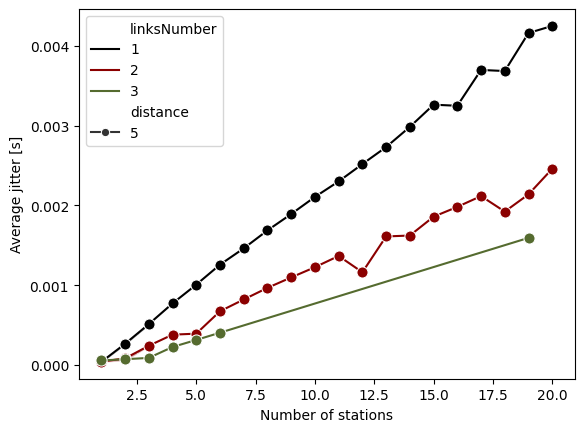

In [19]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='nStations', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)


ax.set(xlabel=xlabel, ylabel='Average jitter [s]')
plt.savefig('sta_jitt.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_79608\1823571070.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='nStations', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')


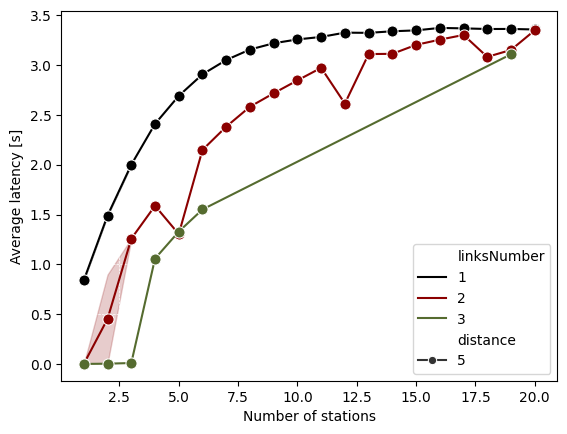

In [15]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='nStations', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)


ax.set(xlabel=xlabel, ylabel='Average latency [s]')
plt.savefig('sta_lat.svg', bbox_inches='tight')